In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, inconsistent
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import pyodbc

C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_24876\2556407582.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM ml.Death_GHDX", con=cnxn)


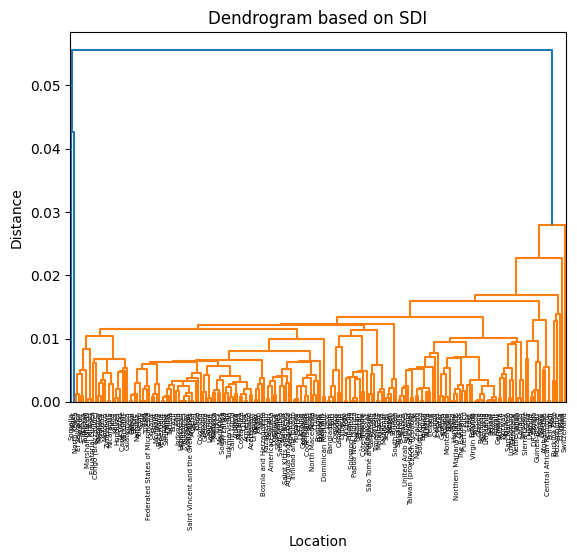

In [2]:


# Connection String
serverName = "datasolve.database.windows.net" 
databaseName = "DataSolveDB"
username = "sqladmin"
password = "AlfaBravo2024"

# Make the connection to our Server
connection_string = f'DRIVER={{SQL Server}};SERVER='+serverName+';DATABASE='+databaseName+';UID='+username+';PWD='+ password
cnxn = pyodbc.connect(connection_string)
cursor = cnxn.cursor()

# Read data from SQL Server
df = pd.read_sql_query("SELECT * FROM ml.Death_GHDX", con=cnxn)

# Group by 'location' and calculate the mean of 'SDI' for each group
grouped_df = df.groupby('location')['SDI'].mean().reset_index()

# Perform hierarchical clustering
linked = linkage(grouped_df[['SDI']], 'single')

# Create a dendrogram
dendrogram(linked, orientation='top', labels=grouped_df['location'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram based on SDI')
plt.xlabel('Location')
plt.ylabel('Distance')
plt.show()


